In [99]:
%%file main2.c 

#include <stdio.h>
#include <math.h>

double correlacion_spearman(double *x, double *y, int n) {
    double diferencia = 0.0;


    for (int i = 0; i < n; i++) {
        diferencia += (x[i] - y[i]);
    }
    double denominador = pow(n,3) - n;
    double correlacion =  1 - (6 * pow(diferencia,2) / denominador);
    return correlacion;
}

Overwriting main2.c


In [100]:
! gcc -c main2.c -o main2.o
! gcc -shared main2.o -o main2.so

In [101]:
def python_spearman(x,y,N):
    diferencia = 0
    for i in range(N):
        diferencia += (x[i] - y[i])  
    denominador =  N ** 3   - N
    correlacion = 1 - (6 * (diferencia ** 2)/ denominador)   
    return correlacion                

In [102]:
import ctypes
import numpy as np

lib = ctypes.CDLL('./main2.so') 

lib.correlacion_spearman.argtypes = [np.ctypeslib.ndpointer(dtype=np.double),  
                                    np.ctypeslib.ndpointer(dtype=np.double),  
                                    ctypes.c_int
                                    ]
lib.correlacion_spearman.restype = ctypes.c_double

In [103]:
#alturas = np.array([165.0, 170.5, 155.2, 180.0, 160.8])
#pesos = np.array([65.5, 75.0, 50.2, 85.5, 62.0])
# pip install scipy
from scipy.stats import spearmanr

arreglo1 = np.random.rand(16)
arreglo2 = np.random.rand(16)

mean_x = np.mean(arreglo1)
mean_y = np.mean(arreglo2)

rpta_c = lib.correlacion_spearman(arreglo1, arreglo2, len(arreglo1))
rpta_py = python_spearman(arreglo1, arreglo2, len(arreglo1))
rpta_spe = spearmanr(arreglo1, arreglo2)[0]

# Imprimir los resultados
print(f"Resultado de la función de C: {rpta_c}")
print(f"Resultado de la funcion de Python: {rpta_py}")
print(f"Resultado de spearmanr: {rpta_spe}")

Resultado de la función de C: 0.9999138950695048
Resultado de la funcion de Python: 0.9999138950695048
Resultado de spearmanr: 0.4264705882352941


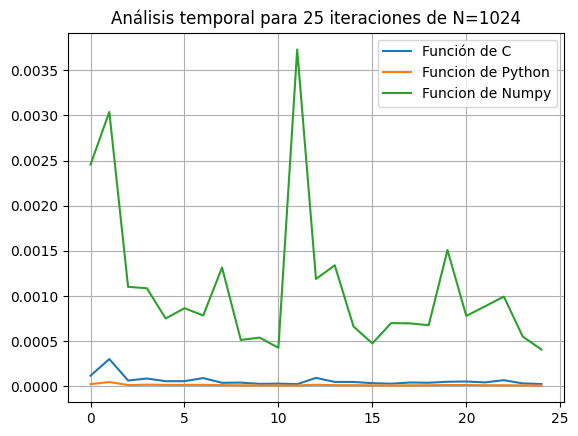

In [104]:
import time 
import matplotlib.pyplot as plt

N = 1024
iter = 25

c_time= []
py_time = []
numpy_time = []


for i in range(iter):

    c_start_time = time.time()
    rpta_c = lib.correlacion_spearman(arreglo1, arreglo2, len(arreglo1))
    c_end_time = time.time()
    c_time.append(c_end_time - c_start_time) 

    py_start_time = time.time()
    rpta_c = python_spearman(arreglo1, arreglo2, len(arreglo1))
    py_end_time = time.time()
    py_time.append(py_end_time - py_start_time) 

    numpy_start_time = time.time()
    rpta_spe = spearmanr(arreglo1, arreglo2)[0]
    numpy_end_time = time.time()
    numpy_time.append(numpy_end_time - numpy_start_time) 



plt.plot(range(iter),c_time, label='Función de C')
plt.plot(range(iter),py_time, label='Funcion de Python')
plt.plot(range(iter),numpy_time, label='Funcion de Numpy')
plt.legend()
plt.grid(True)
plt.title('Análisis temporal para 25 iteraciones de N=1024')
plt.show()

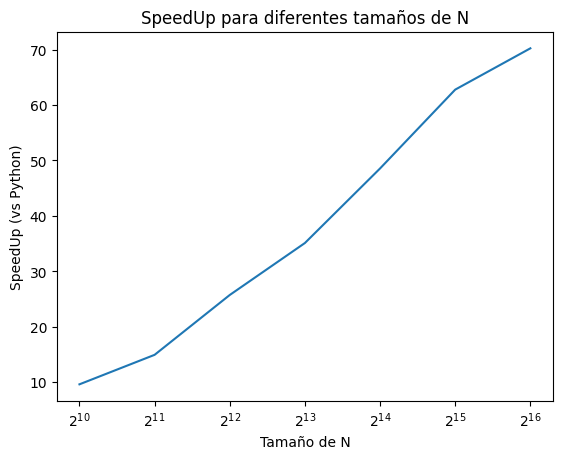

In [105]:
size = [2**i for i in range(10, 17)]
iter= 25
big_c_times = []
big_py_times= []

for N in size:
    c_times = []
    py_times = []

    for _ in range(iter):

        arreglo1 = np.random.rand(N)
        arreglo2 = np.random.rand(N)
        
        mean_x = np.mean(arreglo1)
        mean_y = np.mean(arreglo2)

        c_start_time = time.time()
        rpta_c = lib.correlacion_spearman(arreglo1, arreglo2, N)
        c_end_time = time.time()
        c_times.append(c_end_time - c_start_time)

        py_start_time = time.time()
        rpta_py = python_spearman(arreglo1, arreglo2, N)
        py_end_time = time.time()
        py_times.append(py_end_time - py_start_time)

    # Calcular la mediana de los tiempos
    big_c_times.append(np.median(c_times))
    big_py_times.append(np.median(py_times))

# Calcular el SpeedUp
#speedup = [big_c_times /big_py_times for big_py_times,big_c_times in zip(big_py_times, big_c_times)]
speedup = np.divide(big_py_times, big_c_times)
# Graficar speedup
plt.plot(size, speedup)
plt.xscale('log', base=2)
plt.xlabel('Tamaño de N')
plt.ylabel('SpeedUp (vs Python)')
plt.title('SpeedUp para diferentes tamaños de N')
plt.show()